Problem Statement-
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC.
You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline

In [2]:
train = pd.read_csv("train_bikes.csv", parse_dates= ['datetime']) # loading the training data
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
train.info() # observing the datatypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
# Looking at the training data from the end
train.tail()

datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [5]:
# creating the list containing column names consist of dtype 'int64' and 'float64'
x = train.select_dtypes(include = ['int64' , 'float64']).columns.to_list() 
len(x)

11

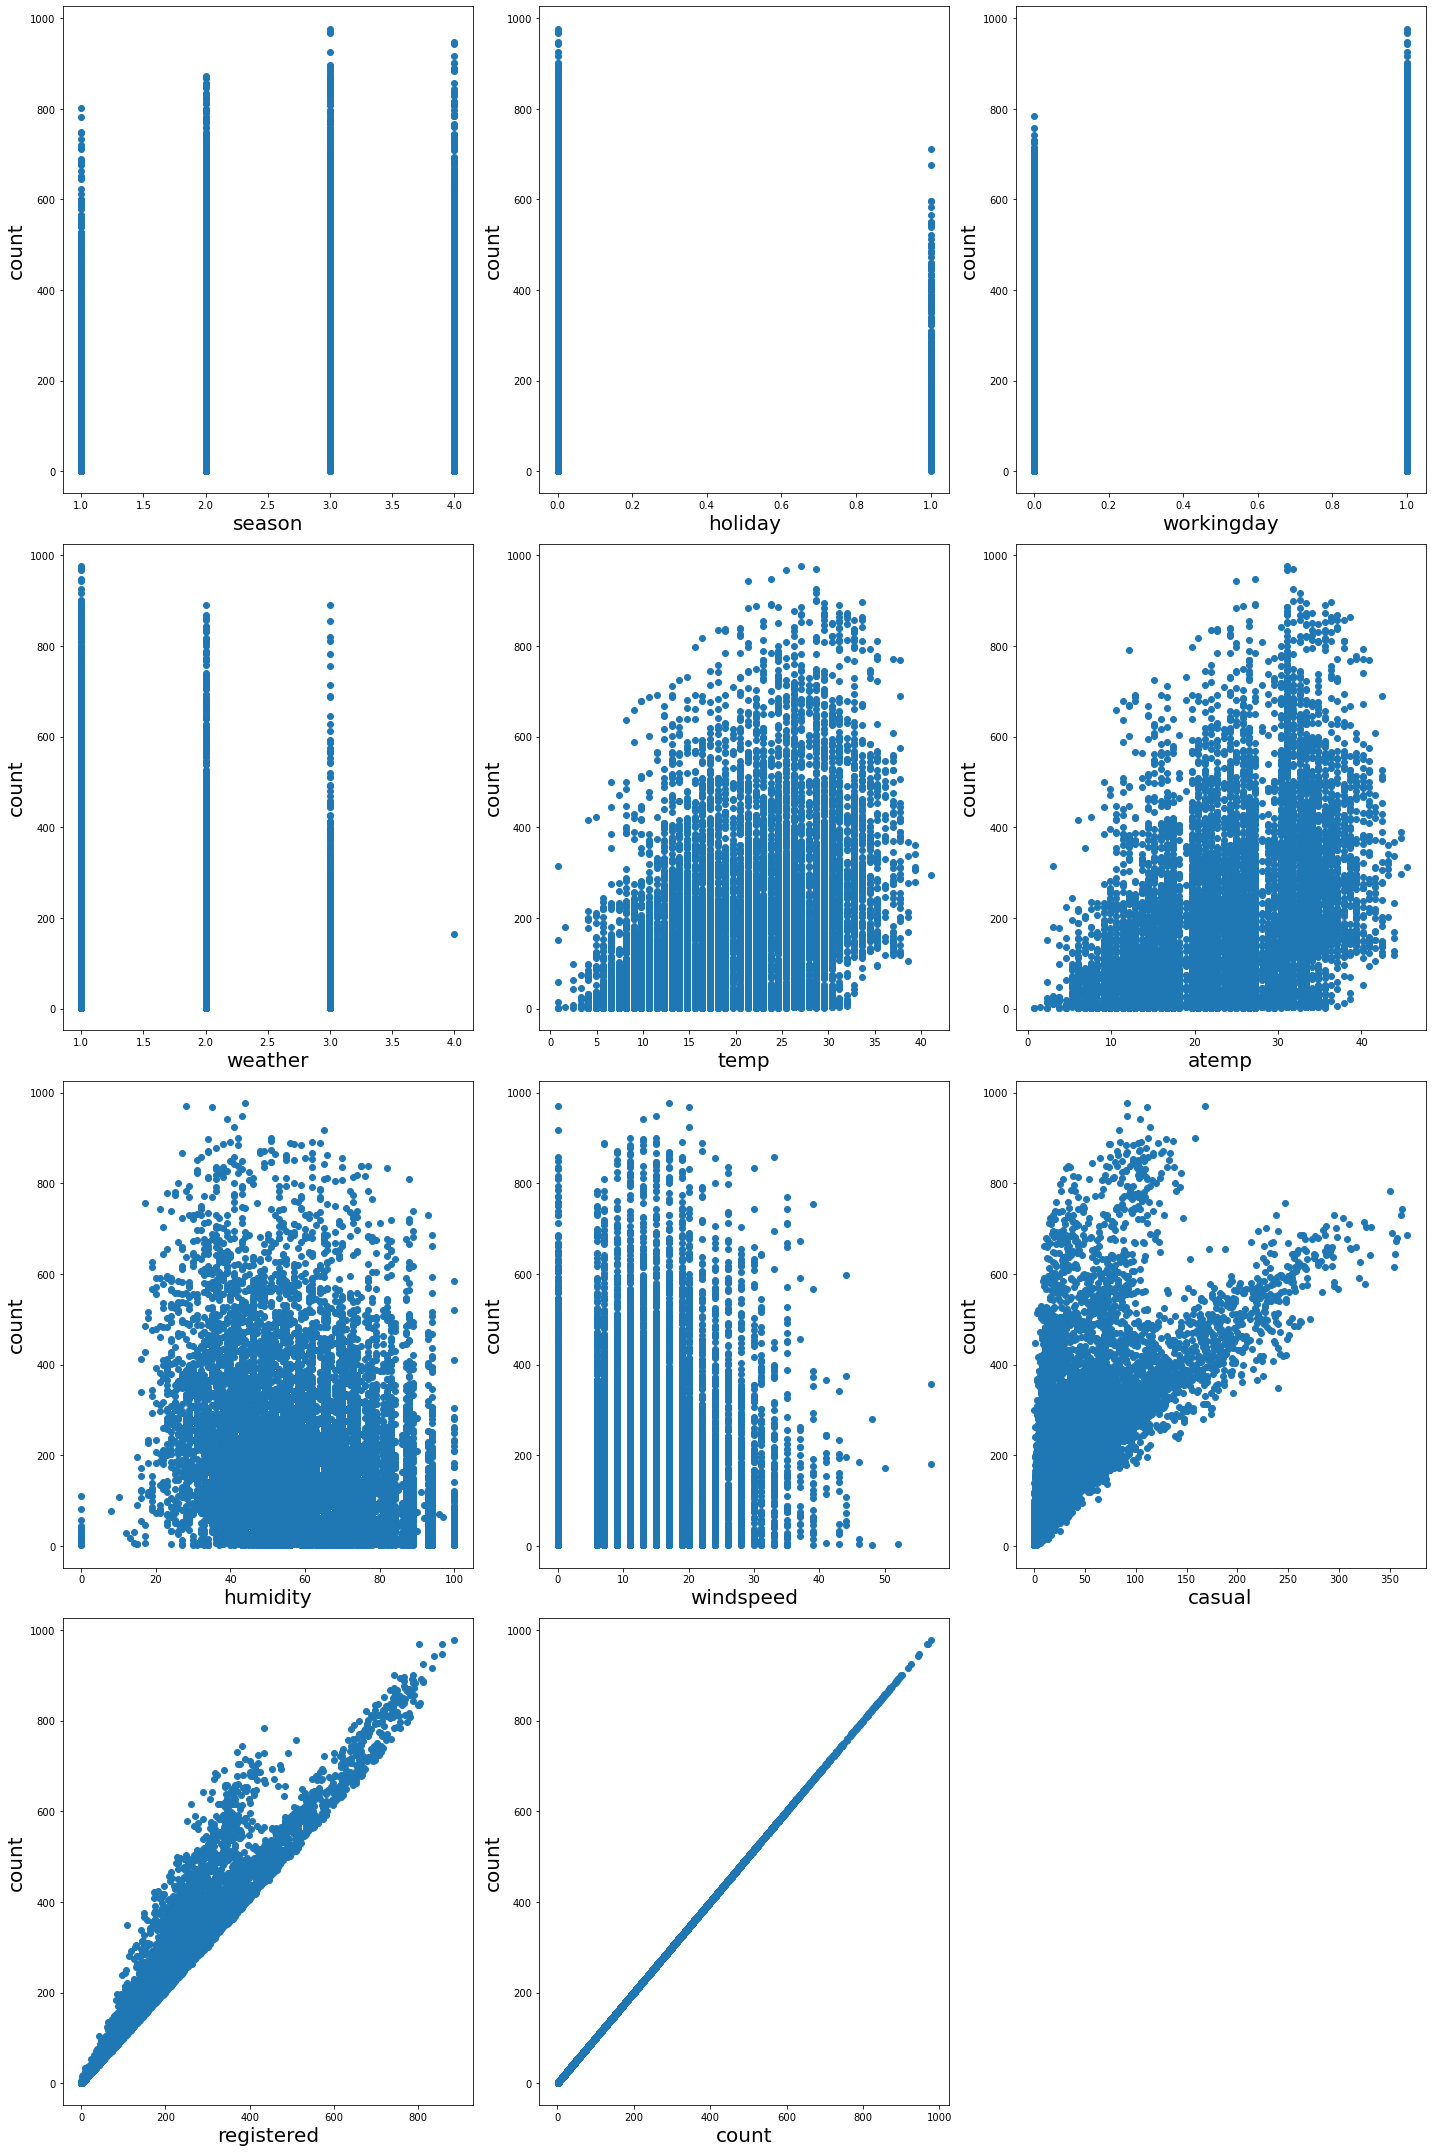

In [6]:
#plotting the count with respect to different features

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in x :
    if plotnumber <= 12 :
        ax = plt.subplot(4,3,plotnumber)
        plt.scatter(train[column],train['count'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count', fontsize = 20)
    plotnumber += 1
plt.tight_layout()


In [7]:
"""Generate the descriptive statisstics that summarize the central tendency, dispersion and shape of a dataset's distribution"""
train.describe().T

count        mean         std   min      25%      50%       75%  \
season      10886.0    2.506614    1.116174  1.00   2.0000    3.000    4.0000   
holiday     10886.0    0.028569    0.166599  0.00   0.0000    0.000    0.0000   
workingday  10886.0    0.680875    0.466159  0.00   0.0000    1.000    1.0000   
weather     10886.0    1.418427    0.633839  1.00   1.0000    1.000    2.0000   
temp        10886.0   20.230860    7.791590  0.82  13.9400   20.500   26.2400   
atemp       10886.0   23.655084    8.474601  0.76  16.6650   24.240   31.0600   
humidity    10886.0   61.886460   19.245033  0.00  47.0000   62.000   77.0000   
windspeed   10886.0   12.799395    8.164537  0.00   7.0015   12.998   16.9979   
casual      10886.0   36.021955   49.960477  0.00   4.0000   17.000   49.0000   
registered  10886.0  155.552177  151.039033  0.00  36.0000  118.000  222.0000   
count       10886.0  191.574132  181.144454  1.00  42.0000  145.000  284.0000   

                 max  
season        4.0000  
holiday       1.0000  
workingday    1.0000  
weather       4.0000  
temp         41.0000  
atemp        45.4550  
humidity    100.0000  
windspeed    56.9969  
casual      367.0000  
registered  886.0000  
count       977.0000

In [8]:
# loading the test data
test = pd.read_csv('test_bikes.csv')

In [9]:
# looking at the first 5 rows of the test data
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [10]:
# last 5 rows of test data
test.tail()

datetime  season  holiday  workingday  weather   temp  \
6488  2012-12-31 19:00:00       1        0           1        2  10.66   
6489  2012-12-31 20:00:00       1        0           1        2  10.66   
6490  2012-12-31 21:00:00       1        0           1        1  10.66   
6491  2012-12-31 22:00:00       1        0           1        1  10.66   
6492  2012-12-31 23:00:00       1        0           1        1  10.66   

       atemp  humidity  windspeed  
6488  12.880        60    11.0014  
6489  12.880        60    11.0014  
6490  12.880        60    11.0014  
6491  13.635        56     8.9981  
6492  13.635        65     8.9981

In [11]:
# observing the data type for the columnd of test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [12]:
# Generate the descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution for test data
test.describe().T

count       mean        std    min      25%      50%      75%  \
season      6493.0   2.493300   1.091258   1.00   2.0000   3.0000   3.0000   
holiday     6493.0   0.029108   0.168123   0.00   0.0000   0.0000   0.0000   
workingday  6493.0   0.685815   0.464226   0.00   0.0000   1.0000   1.0000   
weather     6493.0   1.436778   0.648390   1.00   1.0000   1.0000   2.0000   
temp        6493.0  20.620607   8.059583   0.82  13.9400  21.3200  27.0600   
atemp       6493.0  24.012865   8.782741   0.00  16.6650  25.0000  31.0600   
humidity    6493.0  64.125212  19.293391  16.00  49.0000  65.0000  81.0000   
windspeed   6493.0  12.631157   8.250151   0.00   7.0015  11.0014  16.9979   

                 max  
season        4.0000  
holiday       1.0000  
workingday    1.0000  
weather       4.0000  
temp         40.1800  
atemp        50.0000  
humidity    100.0000  
windspeed    55.9986

In [13]:
# pandas profiling
import pandas_profiling
train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# printing the number of rows and columns
train.shape

(10886, 12)

In [15]:
# printing if dataset has any NaN value
train.isnull().values.any()

False

In [16]:
# To print the total no. of null values in each column
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
dd = train[ train.datetime.dt.year == 2011]

In [18]:
train.datetime.dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [19]:
dd

datetime  season  holiday  workingday  weather   temp   atemp  \
0    2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1    2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2    2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3    2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4    2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
...                  ...     ...      ...         ...      ...    ...     ...   
5417 2011-12-19 19:00:00       4        0           1        2  14.76  17.425   
5418 2011-12-19 20:00:00       4        0           1        1  16.40  20.455   
5419 2011-12-19 21:00:00       4        0           1        2  14.76  17.425   
5420 2011-12-19 22:00:00       4        0           1        2  14.76  17.425   
5421 2011-12-19 23:00:00       4        0           1        1  14.76  17.425   

      humidity  windspeed  casual  registered  count  
0           81     0.0000       3          13     16  
1           80     0.0000       8          32     40  
2           80     0.0000       5          27     32  
3           75     0.0000       3          10     13  
4           75     0.0000       0           1      1  
...        ...        ...     ...         ...    ...  
5417        53    11.0014      17         234    251  
5418        40    11.0014       9         197    206  
5419        53     8.9981      15         112    127  
5420        57    11.0014      12          95    107  
5421        53    11.0014      10          50     60  

[5422 rows x 12 columns]

In [20]:
dd['hour'] = dd.datetime.dt.hour

C:\Users\T100262\AppData\Local\Temp\ipykernel_7712\3314465495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['hour'] = dd.datetime.dt.hour


In [21]:
dd.loc[:,('hour')] = dd.datetime.dt.hour

C:\Users\T100262\AppData\Local\Temp\ipykernel_7712\3960972069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[:,('hour')] = dd.datetime.dt.hour


In [22]:
dd.groupby(['hour','workingday'])['count'].agg('sum')

hour  workingday
0     0              5397
      1              4492
1     0              4062
      1              2002
2     0              3160
      1              1107
3     0              1523
      1               599
4     0               490
      1               640
5     0               521
      1              2731
6     0              1077
      1             11980
7     0              2555
      1             33109
8     0              5854
      1             54295
9     0              9679
      1             27660
10    0             14550
      1             15384
11    0             17789
      1             17754
12    0             20912
      1             22907
13    0             21096
      1             22678
14    0             20689
      1             20918
15    0             20709
      1             22087
16    0             20565
      1             33450
17    0             18750
      1             61929
18    0             16323
      1             5

In [23]:
dd.groupby(['hour','workingday'])['count'].agg('sum').unstack()

workingday      0      1
hour                    
0            5397   4492
1            4062   2002
2            3160   1107
3            1523    599
4             490    640
5             521   2731
6            1077  11980
7            2555  33109
8            5854  54295
9            9679  27660
10          14550  15384
11          17789  17754
12          20912  22907
13          21096  22678
14          20689  20918
15          20709  22087
16          20565  33450
17          18750  61929
18          16323  57103
19          13694  40118
20          10428  29090
21           8503  22076
22           7016  16658
23           5249  10621

In [24]:
dd.groupby(['hour','workingday'])['count'].agg('sum').unstack()

workingday      0      1
hour                    
0            5397   4492
1            4062   2002
2            3160   1107
3            1523    599
4             490    640
5             521   2731
6            1077  11980
7            2555  33109
8            5854  54295
9            9679  27660
10          14550  15384
11          17789  17754
12          20912  22907
13          21096  22678
14          20689  20918
15          20709  22087
16          20565  33450
17          18750  61929
18          16323  57103
19          13694  40118
20          10428  29090
21           8503  22076
22           7016  16658
23           5249  10621

In [25]:
by_hour = dd.groupby(['hour','workingday'])['count'].agg('sum').unstack()

<AxesSubplot:title={'center':'Year = 2021'}, xlabel='hour'>

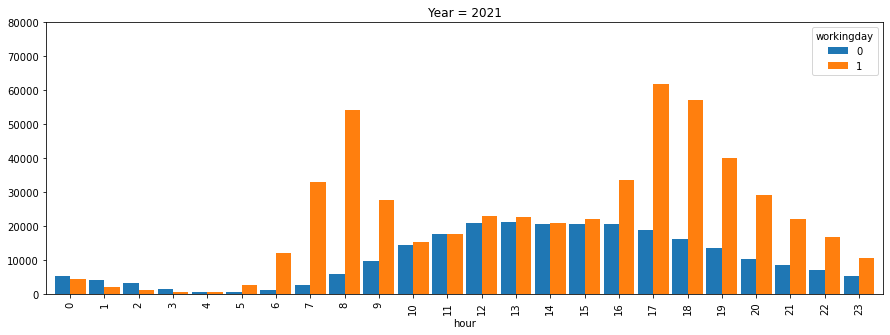

In [26]:
by_hour.plot(kind = 'bar', ylim=(0,80000), figsize = (15,5), width = 0.9, title = "Year = 2021" )

In [27]:
X = None
if X: print("rahul")

In [28]:
train[train.datetime.dt.year == 2011]

datetime  season  holiday  workingday  weather   temp   atemp  \
0    2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1    2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2    2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3    2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4    2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
...                  ...     ...      ...         ...      ...    ...     ...   
5417 2011-12-19 19:00:00       4        0           1        2  14.76  17.425   
5418 2011-12-19 20:00:00       4        0           1        1  16.40  20.455   
5419 2011-12-19 21:00:00       4        0           1        2  14.76  17.425   
5420 2011-12-19 22:00:00       4        0           1        2  14.76  17.425   
5421 2011-12-19 23:00:00       4        0           1        1  14.76  17.425   

      humidity  windspeed  casual  registered  count  
0           81     0.0000       3          13     16  
1           80     0.0000       8          32     40  
2           80     0.0000       5          27     32  
3           75     0.0000       3          10     13  
4           75     0.0000       0           1      1  
...        ...        ...     ...         ...    ...  
5417        53    11.0014      17         234    251  
5418        40    11.0014       9         197    206  
5419        53     8.9981      15         112    127  
5420        57    11.0014      12          95    107  
5421        53    11.0014      10          50     60  

[5422 rows x 12 columns]

In [29]:
train.datetime.dt.hour

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int64

## Method for creating the countplot  based on hour  for a given year

C:\Users\T100262\AppData\Local\Temp\ipykernel_7712\618180240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[:,('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
C:\Users\T100262\AppData\Local\Temp\ipykernel_7712\618180240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[:,('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument


<AxesSubplot:title={'center':'Year = 2012'}, xlabel='hour'>

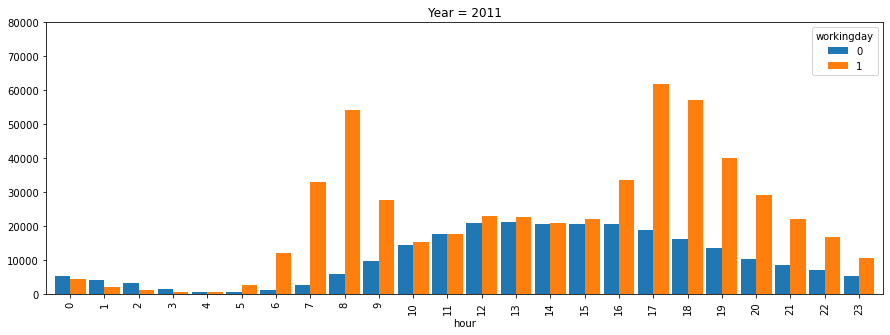

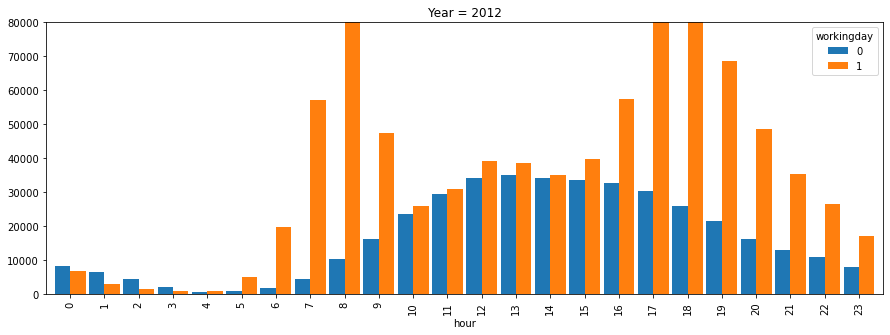

In [30]:
def plot_by_hour(data, year= None, agg='sum'):
    dd = data
    if year: dd = dd[dd.datetime.dt.year == year]
    dd.loc[:,('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
    
    by_hour = dd.groupby(['hour','workingday'])['count'].agg(agg).unstack() # groupby hour and working day
    return by_hour.plot(kind = 'bar', ylim=(0,80000), figsize=(15,5), width=0.9, title = 'Year = {0}'.format(year)) #returning the figure grouped by hour

plot_by_hour(train, year=2011) # plotting the count plot based on hour for 2011
plot_by_hour(train, year=2012) # plotting the count plot based on hour for 2012
        
        

## Method for creating a countplot based on year

<AxesSubplot:title={'center':'Rent bikes per hour in 2011 and 2012'}, xlabel='hour'>

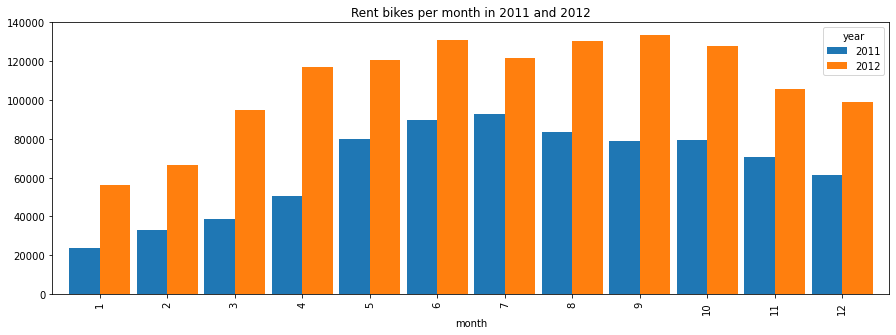

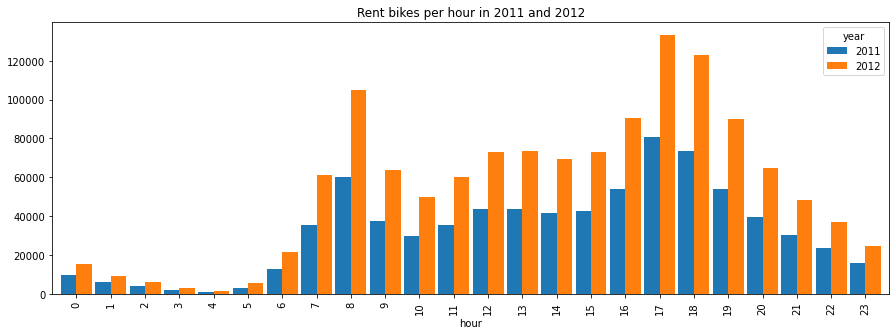

In [31]:
# method for creating a countplot based on year
def plot_by_year(agg_attr, title) :
    # extracting the required fields
    dd = train.copy()
    dd['year']  = train.datetime.dt.year # extracting the year
    dd['month'] = train.datetime.dt.month # extracting the month
    dd['hour']  = train.datetime.dt.hour # extracting the hour
    
    by_year = dd.groupby([agg_attr,'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind = 'bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by year

plot_by_year('month',"Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour',"Rent bikes per hour in 2011 and 2012") # plotting hourly bike rentals based on hour


In [32]:
dd.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  
0        81        0.0       3          13     16     0  
1        80        0.0       8          32     40     1  
2        80        0.0       5          27     32     2  
3        75        0.0       3          10     13     3  
4        75        0.0       0           1      1     4

In [33]:
dd[dd.hour == 0]['count'].values

array([ 16,  17,   5,   5,   6,  11,  17,  25,  25,   5,  12,   7,   7,
        14,  28,  39,  17,   3,   8,   2,  12,  13,  39,  39,  15,  10,
        17,  16,  14,  30,  39,  11,  19,  15,  17,  32,  29,   7,   8,
        13,  12,  19,  52,   4,  10,   9,   3,   6,  34,  38,  11,  14,
         8,  23,  29,  76,   6,  32,  39,   6,  22,  15,  20,  25,  31,
        53,  23,  24,  15,  21,  27,  43,  33,  39,  25,  96, 177,  16,
        27,  27,  56,  86, 100,  53,  18,  38,  44,  52, 102,  39,  38,
        31,  23,  29,  34,  42,  68,  93, 113,  29,  20,  41,  47,  69,
       117, 119,  28,  31,  52,  47,  24, 104,  89,  68, 115, 144, 140,
        55,  37,  35,  47, 121, 154,  35,  22,  46,  46,  80, 110, 125,
        51,  51,  29,  29,  43,  17,  54, 133,  80,  30,  35,  37,  46,
        65,  84,  90,  25,  31,  24,  56,  62,  51,  64,  87, 109,  97,
         8,  13,  14,  16, 116, 108,  16,  26,  33,  37,  48, 108, 112,
        37, 130,  47,  16,  27,  43,  40,  67,  89, 129,  53,  3

In [43]:
dd[dd.hour == 0]['count'].values

array([ 16,  17,   5,   5,   6,  11,  17,  25,  25,   5,  12,   7,   7,
        14,  28,  39,  17,   3,   8,   2,  12,  13,  39,  39,  15,  10,
        17,  16,  14,  30,  39,  11,  19,  15,  17,  32,  29,   7,   8,
        13,  12,  19,  52,   4,  10,   9,   3,   6,  34,  38,  11,  14,
         8,  23,  29,  76,   6,  32,  39,   6,  22,  15,  20,  25,  31,
        53,  23,  24,  15,  21,  27,  43,  33,  39,  25,  96, 177,  16,
        27,  27,  56,  86, 100,  53,  18,  38,  44,  52, 102,  39,  38,
        31,  23,  29,  34,  42,  68,  93, 113,  29,  20,  41,  47,  69,
       117, 119,  28,  31,  52,  47,  24, 104,  89,  68, 115, 144, 140,
        55,  37,  35,  47, 121, 154,  35,  22,  46,  46,  80, 110, 125,
        51,  51,  29,  29,  43,  17,  54, 133,  80,  30,  35,  37,  46,
        65,  84,  90,  25,  31,  24,  56,  62,  51,  64,  87, 109,  97,
         8,  13,  14,  16, 116, 108,  16,  26,  33,  37,  48, 108, 112,
        37, 130,  47,  16,  27,  43,  40,  67,  89, 129,  53,  3

In [34]:
dd = train[train.datetime.dt.year == 2011]

In [35]:
dd

datetime  season  holiday  workingday  weather   temp   atemp  \
0    2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1    2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2    2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3    2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4    2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
...                  ...     ...      ...         ...      ...    ...     ...   
5417 2011-12-19 19:00:00       4        0           1        2  14.76  17.425   
5418 2011-12-19 20:00:00       4        0           1        1  16.40  20.455   
5419 2011-12-19 21:00:00       4        0           1        2  14.76  17.425   
5420 2011-12-19 22:00:00       4        0           1        2  14.76  17.425   
5421 2011-12-19 23:00:00       4        0           1        1  14.76  17.425   

      humidity  windspeed  casual  registered  count  
0           81     0.0000       3          13     16  
1           80     0.0000       8          32     40  
2           80     0.0000       5          27     32  
3           75     0.0000       3          10     13  
4           75     0.0000       0           1      1  
...        ...        ...     ...         ...    ...  
5417        53    11.0014      17         234    251  
5418        40    11.0014       9         197    206  
5419        53     8.9981      15         112    127  
5420        57    11.0014      12          95    107  
5421        53    11.0014      10          50     60  

[5422 rows x 12 columns]

In [36]:
dd['hour'] = train.datetime.dt.hour

C:\Users\T100262\AppData\Local\Temp\ipykernel_7712\1361864695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['hour'] = train.datetime.dt.hour


In [37]:
hours = {}
for hour in range(24):
    hours[hour] = dd[dd.hour == hour]['count'].values
    

In [38]:
hours

{0: array([ 16,  17,   5,   5,   6,  11,  17,  25,  25,   5,  12,   7,   7,
         14,  28,  39,  17,   3,   8,   2,  12,  13,  39,  39,  15,  10,
         17,  16,  14,  30,  39,  11,  19,  15,  17,  32,  29,   7,   8,
         13,  12,  19,  52,   4,  10,   9,   3,   6,  34,  38,  11,  14,
          8,  23,  29,  76,   6,  32,  39,   6,  22,  15,  20,  25,  31,
         53,  23,  24,  15,  21,  27,  43,  33,  39,  25,  96, 177,  16,
         27,  27,  56,  86, 100,  53,  18,  38,  44,  52, 102,  39,  38,
         31,  23,  29,  34,  42,  68,  93, 113,  29,  20,  41,  47,  69,
        117, 119,  28,  31,  52,  47,  24, 104,  89,  68, 115, 144, 140,
         55,  37,  35,  47, 121, 154,  35,  22,  46,  46,  80, 110, 125,
         51,  51,  29,  29,  43,  17,  54, 133,  80,  30,  35,  37,  46,
         65,  84,  90,  25,  31,  24,  56,  62,  51,  64,  87, 109,  97,
          8,  13,  14,  16, 116, 108,  16,  26,  33,  37,  48, 108, 112,
         37, 130,  47,  16,  27,  43,  40,  67, 

In [49]:
[hours[hour] for hour in range(24)]

[array([ 16,  17,   5,   5,   6,  11,  17,  25,  25,   5,  12,   7,   7,
         14,  28,  39,  17,   3,   8,   2,  12,  13,  39,  39,  15,  10,
         17,  16,  14,  30,  39,  11,  19,  15,  17,  32,  29,   7,   8,
         13,  12,  19,  52,   4,  10,   9,   3,   6,  34,  38,  11,  14,
          8,  23,  29,  76,   6,  32,  39,   6,  22,  15,  20,  25,  31,
         53,  23,  24,  15,  21,  27,  43,  33,  39,  25,  96, 177,  16,
         27,  27,  56,  86, 100,  53,  18,  38,  44,  52, 102,  39,  38,
         31,  23,  29,  34,  42,  68,  93, 113,  29,  20,  41,  47,  69,
        117, 119,  28,  31,  52,  47,  24, 104,  89,  68, 115, 144, 140,
         55,  37,  35,  47, 121, 154,  35,  22,  46,  46,  80, 110, 125,
         51,  51,  29,  29,  43,  17,  54, 133,  80,  30,  35,  37,  46,
         65,  84,  90,  25,  31,  24,  56,  62,  51,  64,  87, 109,  97,
          8,  13,  14,  16, 116, 108,  16,  26,  33,  37,  48, 108, 112,
         37, 130,  47,  16,  27,  43,  40,  67,  89

(1.0, 1100.0)

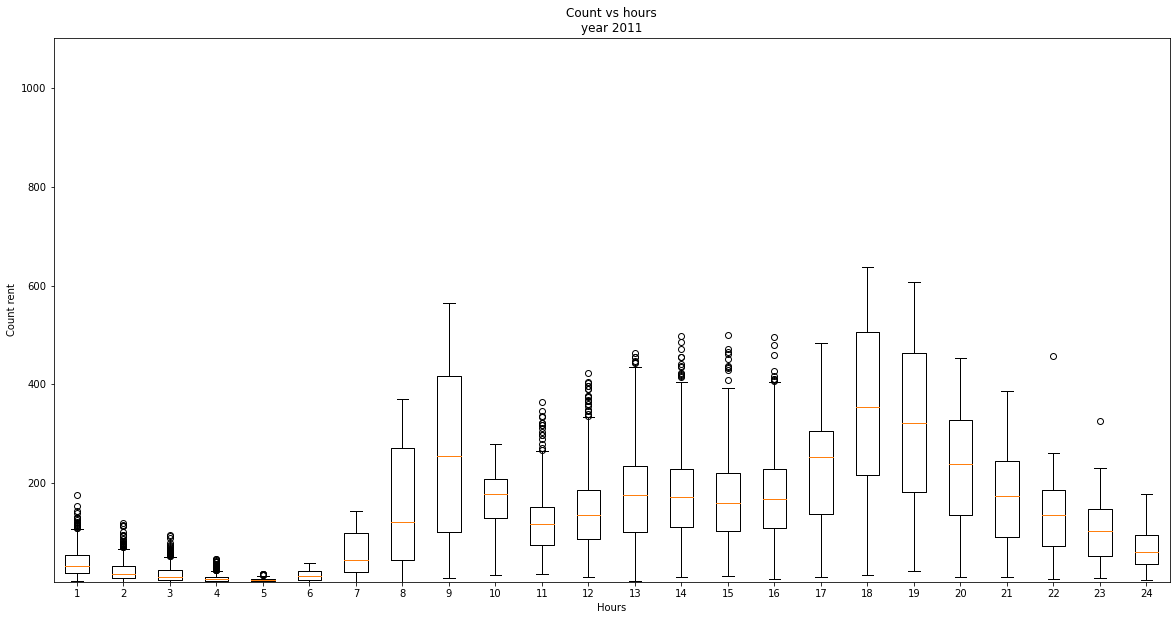

In [40]:
message = 'year 2011'
plt.figure(figsize = (20,10))
plt.ylabel("Count rent")
plt.xlabel("Hours")
plt.title("Count vs hours\n" + message)
plt.boxplot([hours[hour] for hour in range(24)])

axis = plt.gca()
axis.set_ylim([1,1100])

In [57]:
#method to plot a graph for count per hour
def plot_hours(data, message = '') :
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour # extracting the hour
    
    hours = {}
    for hour in range(24) :
        hours[hour] = dd[dd.hour == hour]['count'].values
        
    plt.figure(figsize = (20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("Count vs hours\n" + message)
    plt.boxplot([hours[hour] for hour in range(24)])
    
    axis = plt.gca()
    axis.set_ylim([1,1100])

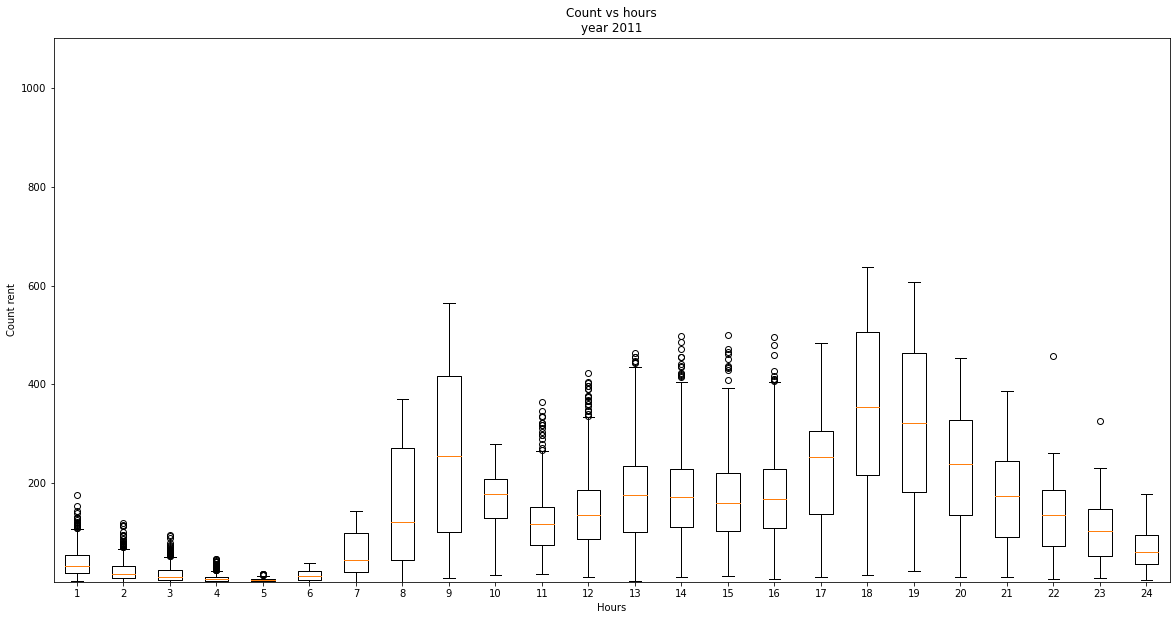

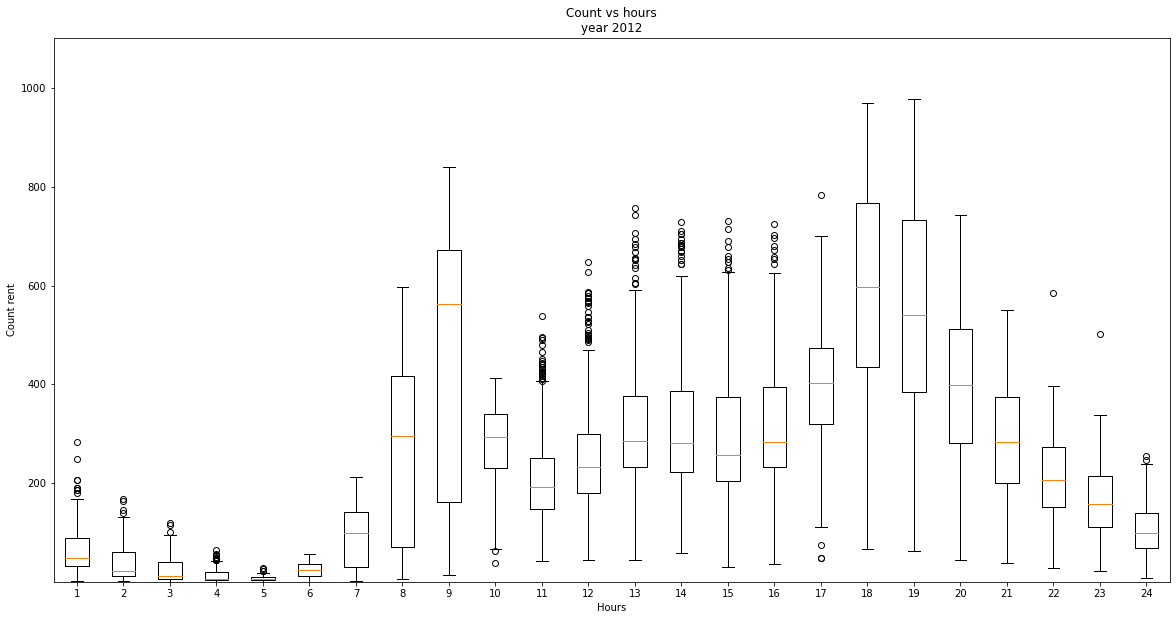

In [58]:
plot_hours(train[train.datetime.dt.year == 2011], 'year 2011') #box plot for the hourly count for the mentioned year
plot_hours(train[train.datetime.dt.year == 2012], 'year 2012') #box plot for the hourly count for the mentioned year

In [59]:
dt = pd.to_datetime(train["datetime"]) # converting the column to datetime for train dataset

In [64]:
dt

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [61]:
train['hour'] = dt.map(lambda x: x.hour)

In [62]:
train

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  hour  
0      14.395        81     0.0000       3          13     16     0  
1      13.635        80     0.0000       8          32     40     1  
2      13.635        80     0.0000       5          27     32     2  
3      14.395        75     0.0000       3          10     13     3  
4      14.395        75     0.0000       0           1      1     4  
...       ...       ...        ...     ...         ...    ...   ...  
10881  19.695        50    26.0027       7         329    336    19  
10882  17.425        57    15.0013      10         231    241    20  
10883  15.910        61    15.0013       4         164    168    21  
10884  17.425        61     6.0032      12         117    129    22  
10885  16.665        66     8.9981       4          84     88    23  

[10886 rows x 13 columns]

In [63]:
dt = pd.to_datetime(train["datetime"]) #converting the column to datetime for train dataset
train["hour"] = dt.map(lambda x : x.hour) #adding the hour column to train dataset
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  
0        81        0.0       3          13     16     0  
1        80        0.0       8          32     40     1  
2        80        0.0       5          27     32     2  
3        75        0.0       3          10     13     3  
4        75        0.0       0           1      1     4

In [65]:
dt_test = pd.to_datetime(test['datetime']) # converting the column to datetime for test dataset
test['hour'] = dt_test.map(lambda x : x.hour) # adding the hour collumn to the test dataset
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  hour  
0        56    26.0027     0  
1        56     0.0000     1  
2        56     0.0000     2  
3        56    11.0014     3  
4        56    11.0014     4

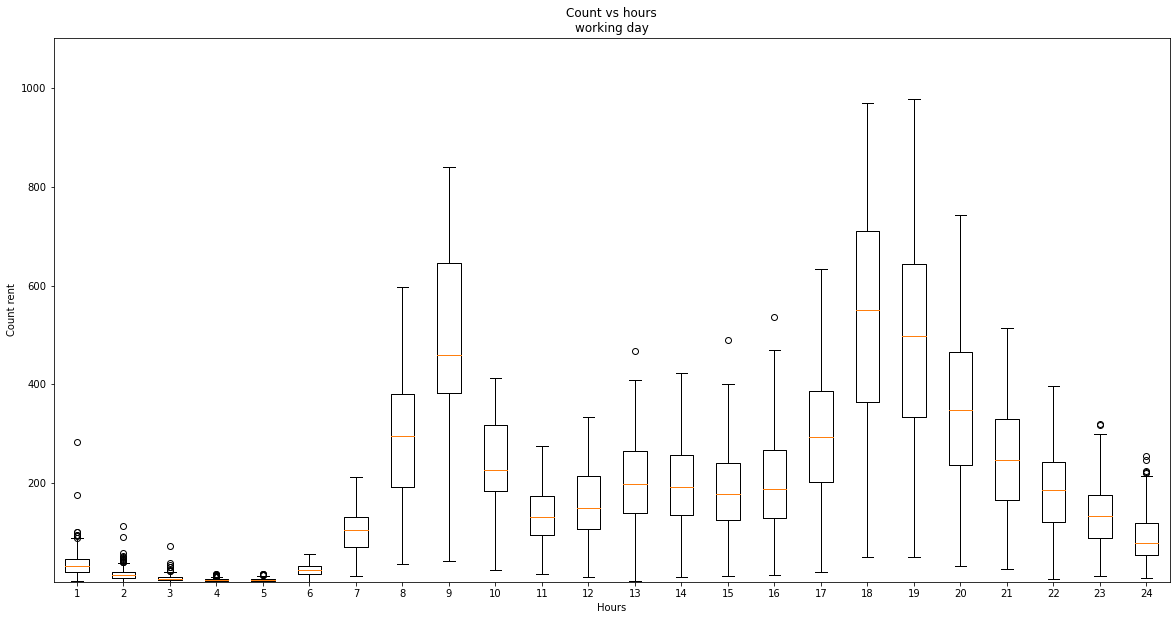

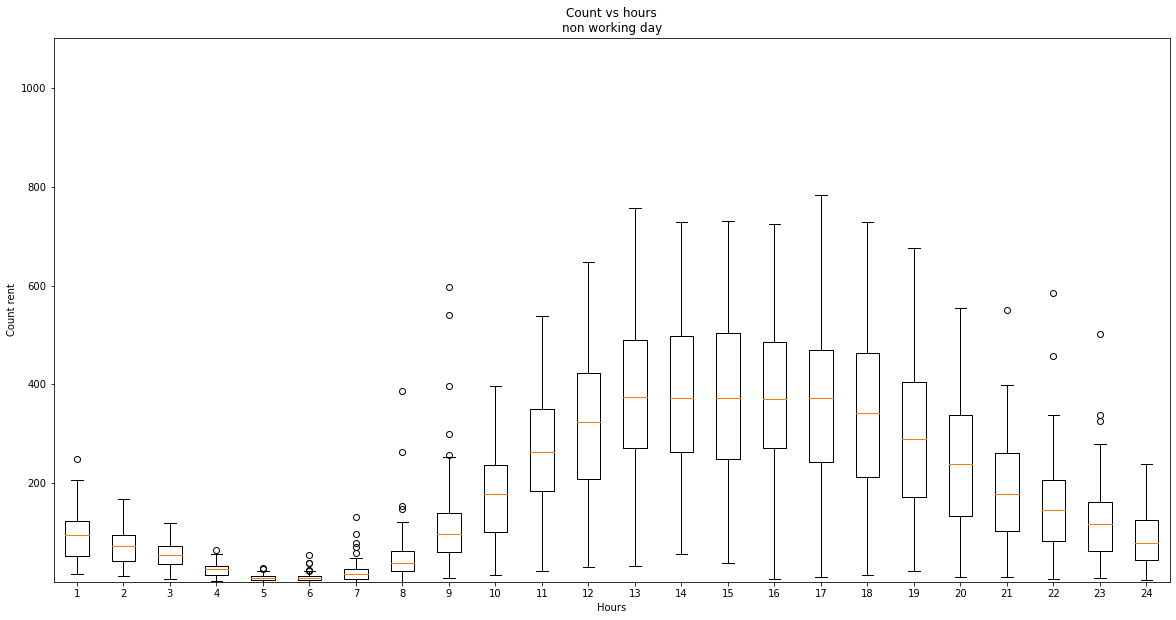

In [67]:
plot_hours(train[train.workingday == 1], 'working day') # plotting the hourly count of rented bikes for working days for a given year
plot_hours(train[train.workingday == 0], 'non working day') # plottinf the hourly count for rented bikes for non working days for a given year

In [72]:
# method to convert categorical data to numeric data
def categorical_to_numeric(x):
    if 0 <= x < 6 :
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3


In [73]:
train['hour'] = train['hour'].apply(categorical_to_numeric) #applying the above conversion logic to training data
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  
0        81        0.0       3          13     16     0  
1        80        0.0       8          32     40     0  
2        80        0.0       5          27     32     0  
3        75        0.0       3          10     13     0  
4        75        0.0       0           1      1     0

In [74]:
test['hour'] = test['hour'].apply(categorical_to_numeric) # applying the above conversion logic to test data
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  hour  
0        56    26.0027     0  
1        56     0.0000     0  
2        56     0.0000     0  
3        56    11.0014     0  
4        56    11.0014     0

In [75]:
# drop unnecessary columns

train = train.drop(['datetime'], axis = 1)
test  = test.drop(['datetime'], axis = 1)

In [76]:
train.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count  hour  
0       3          13     16     0  
1       8          32     40     0  
2       5          27     32     0  
3       3          10     13     0  
4       0           1      1     0

In [ ]:
# an hour vs count graph depicting the average bike demand based on hour
figure, axes = plt.subplots(figsize = (10,5))

<Figure size 720x360 with 0 Axes>

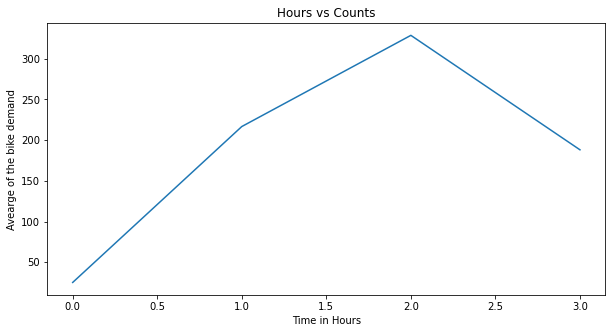

<Figure size 720x360 with 0 Axes>

In [88]:
figure,axes = plt.subplots(figsize = (10,5))
hours = train.groupby(['hour']).agg('mean')['count']
hours.plot(kind = 'line', ax = axes)
plt.title("Hours vs Counts")
axes.set_xlabel('Time in Hours')
axes.set_ylabel('Avearge of the bike demand')
plt.figure(figsize = (10,5))


In [91]:
# count of different temp values
train.groupby('temp').agg('mean')[['count']]

count
temp             
0.82    77.714286
1.64    91.500000
2.46    43.000000
3.28    19.272727
4.10    50.272727
4.92    58.416667
5.74    53.233645
6.56    68.109589
7.38    67.754717
8.20    81.995633
9.02    73.616935
9.84    86.442177
10.66   92.560241
11.48  111.066298
12.30  120.002597
13.12  148.547753
13.94  145.053269
14.76  152.957173
15.58  179.682353
16.40  170.217500
17.22  182.609551
18.04  160.878049
18.86  159.692118
19.68  185.058824
20.50  204.672783
21.32  196.480663
22.14  184.717122
22.96  212.392405
23.78  235.650246
24.60  237.182051
25.42  222.062035
26.24  232.403974
27.06  211.025381
27.88  203.433036
28.70  257.679157
29.52  277.691218
30.34  303.193980
31.16  352.801653
31.98  318.683673
32.80  355.623762
33.62  348.323077
34.44  340.225000
35.26  342.934211
36.08  362.869565
36.90  318.717391
37.72  332.176471
38.54  238.857143
39.36  317.833333
41.00  294.000000

In [98]:
# count of different temp values
a = train.groupby('temp')[['count']].mean()
a

count
temp             
0.82    77.714286
1.64    91.500000
2.46    43.000000
3.28    19.272727
4.10    50.272727
4.92    58.416667
5.74    53.233645
6.56    68.109589
7.38    67.754717
8.20    81.995633
9.02    73.616935
9.84    86.442177
10.66   92.560241
11.48  111.066298
12.30  120.002597
13.12  148.547753
13.94  145.053269
14.76  152.957173
15.58  179.682353
16.40  170.217500
17.22  182.609551
18.04  160.878049
18.86  159.692118
19.68  185.058824
20.50  204.672783
21.32  196.480663
22.14  184.717122
22.96  212.392405
23.78  235.650246
24.60  237.182051
25.42  222.062035
26.24  232.403974
27.06  211.025381
27.88  203.433036
28.70  257.679157
29.52  277.691218
30.34  303.193980
31.16  352.801653
31.98  318.683673
32.80  355.623762
33.62  348.323077
34.44  340.225000
35.26  342.934211
36.08  362.869565
36.90  318.717391
37.72  332.176471
38.54  238.857143
39.36  317.833333
41.00  294.000000

<AxesSubplot:xlabel='temp'>

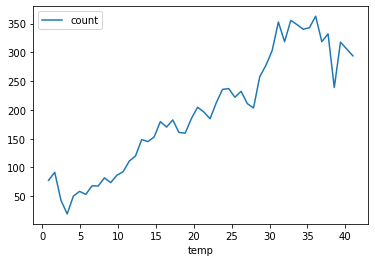

In [102]:
a.plot()

In [104]:
# count of different atemp value
a = train.groupby(['atemp'])[['count']].mean()
a

count
atemp             
0.760     1.000000
1.515     3.000000
2.275    38.000000
3.030    82.285714
3.790    39.062500
4.545    66.090909
5.305    63.200000
6.060    64.876712
6.820    56.380952
7.575    55.933333
8.335    58.444444
9.090    80.000000
9.850    81.456693
10.605   95.951807
11.365   90.442804
12.120  102.656410
12.880   89.518219
13.635   94.308017
14.395  116.483271
15.150  133.967456
15.910  133.897638
16.665  148.509186
17.425  147.799363
18.180  133.585366
18.940  149.555556
19.695  179.682353
20.455  170.217500
21.210  182.609551
21.970  160.878049
22.725  159.692118
23.485  185.058824
24.240  204.672783
25.000  195.109589
25.760  179.626478
26.515  212.392405
27.275  200.503546
28.030  133.312500
28.790  142.771429
29.545  151.046693
30.305  227.291429
31.060  308.323398
31.820  258.655518
32.575  331.746324
33.335  244.107143
34.090  295.183036
34.850  277.448763
35.605  312.144654
36.365  349.243902
37.120  334.144068
37.880  351.835052
38.635  335.783784
39.395  319.194030
40.150  369.577778
40.910  324.512821
41.665  281.434783
42.425  301.958333
43.180  307.142857
43.940  215.428571
44.695  354.333333
45.455  312.000000

<AxesSubplot:xlabel='atemp'>

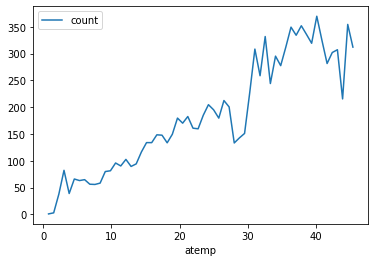

In [105]:
a.plot()

In [107]:
# count based on holiday
a = train.groupby(['holiday'])[['count']].mean()
a

count
holiday            
0        191.741655
1        185.877814

<AxesSubplot:xlabel='holiday'>

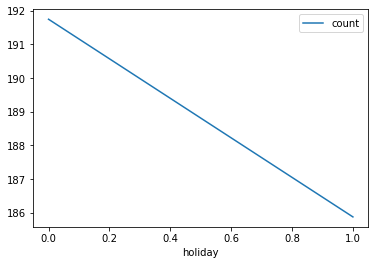

In [108]:
a.plot()

In [109]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour'],
      dtype='object')

In [110]:
# method to select the features. If a feature is not in the blacklist, it gets selected
def select_features(data):
    black_list = ['casual', 'registered', 'count', 'is_test', 'datetime', 'count_log' ]
    return [feat for feat in data.columns if feat not in black_list]

In [112]:
# a method to show results of various models and thier predictions
def _simple_modeling(X_train, X_test, y_train, y_test):
    # specifying the model names
    models = [
        ('dummy_mean', DummyRegressor(stratrgy='mean')),
        ('dummy_median', DummyRegressor(strategy='median')),
        ('random_forest', RandomFroestRegressor(random_state= 0))
    ]
    
    results = []
    
    for name, model in models:
        model.fit(X_train, y_train) # fitting the training data to the model
        y_pred = model.predict(X_test) # doing predictions using the model
        
        results.append((name, y_test, y_pred)) # creating the lsit of predictions from various models
        
    return results

# a method to return the performance metric of the model used in the above method
def simple_modeling(X_train, X_test, y_train, y_test):
    results = _simple_modeling(X_train,X_test,y_train,y_test) # using the function used above to calculate the predictions
    
    return [(r[0], rmse(r[1],r[2])) for r in results] # returning the performance metrics